In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [2]:
!pip install xgboost

In [3]:
df = pd.read_csv("./drive/MyDrive/Crop_recommendation.csv")

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
df.size

17600

In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
df.dtypes

,0
N,int64
P,int64
K,int64
temperature,float64
humidity,float64
ph,float64
rainfall,float64
label,object


In [10]:
df['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [11]:
crop_names = df['label']

In [12]:
crop_names

,label
0,rice
1,rice
2,rice
3,rice
4,rice
...,...
2195,coffee
2196,coffee
2197,coffee
2198,coffee


In [13]:
#initialize label encoder
label_encoder = LabelEncoder()

#label encoder ki help se column data ko transform karna h
df['label'] = label_encoder.fit_transform(df['label'])

In [14]:
df['label'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [15]:
for x,y in zip(crop_names, df['label']):
  print(f"{x} -> {y}")

rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20
rice -> 20

<Axes: >

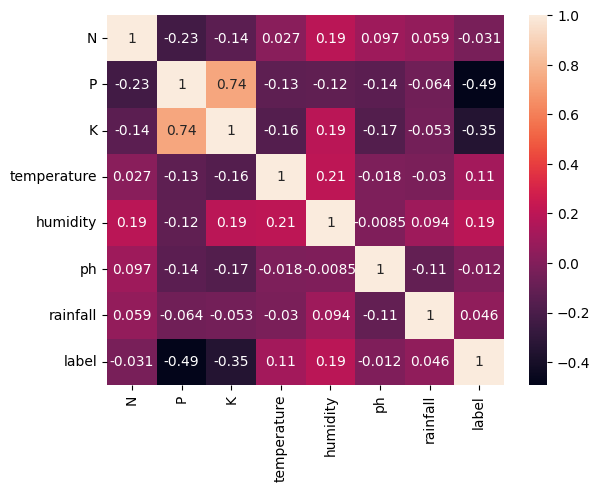

In [16]:
sns.heatmap(df.corr(),annot=True)

In [17]:
features = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']  #hume at last ye vala target chahiye
labels = df['label']

In [18]:
#humne empty list banaya har model k liye and uske corressponding uski accuracy ko store karna k liye
acc = []
model = []

In [19]:
from re import X
#training and testing data m split karna hai
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=2)

In [20]:
#gausian naive bayses algorithm
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train)

predicted_value = NaiveBayes.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_value)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(y_test,predicted_value))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.88      1.00      0.93        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00  

In [21]:
import pickle
NB_pkl_filename = 'NB_pkl_file.pkl'
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
NB_Model_pkl.close()

In [22]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train, y_train)
predicted_value = DecisionTree.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_value)
acc.append(x)
model.append('Decision Tree')

print("Decision Tree's Accuracy is: ", x*100)
print(classification_report(y_test, predicted_value))

Decision Tree's Accuracy is:  90.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.59      1.00      0.74        16
           3       1.00      1.00      1.00        21
           4       0.91      1.00      0.95        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.74      0.93      0.83        28
           9       0.00      0.00      0.00        14
          10       0.68      1.00      0.81        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       0.00      0.00      0.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00   

In [23]:
import pickle
DT_pkl_filename = 'DT_pkl_file.pkl'
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
DT_Model_pkl.close()

In [24]:
#support vetor machine (SVM)

from sklearn.svm import SVC

#data normalization
from sklearn.preprocessing import MinMaxScaler

#fiting the scaler on train data
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)

#transforming test data
X_test_norm = norm.transform(X_test)

SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,y_train)

predicted_value = SVM.predict(X_test_norm)
x = metrics.accuracy_score(y_test, predicted_value)
acc.append(x)
model.append('SVM')

print("SVM's Accuracy is: ", x)

print(classification_report(y_test,predicted_value))

SVM's Accuracy is:  0.9795454545454545
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      0.95      0.98        22
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        18
           8       0.83      0.89      0.86        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.0

In [25]:
#saving svm trained model
import pickle
SVM_pkl_filename = 'SVM_pkl_file.pkl'
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
SVM_Model_pkl.close()

In [26]:
#logistic regression

from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(random_state = 2)

LogReg.fit(X_train, y_train)

predicted_value = LogReg.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_value)
acc.append(x)
model.append('Logistic Regression')

print("Logistic Regression's Accuracy is: ", x)
print(classification_report(y_test, predicted_value))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.86      0.75      0.80        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       0.86      0.90      0.88        20
           7       1.00      1.00      1.00        18
           8       0.84      0.93      0.88        28
           9       1.00      1.00      1.00        14
          10       0.88      1.00      0.94        23
          11       0.90      0.86      0.88        21
          12       0.96      1.00      0.98        26
          13       0.84      0.84      0.84        19
          14       1.00      0.96      0.98        24
          15       1.00      1.00      1.00        23
          16       1.00   

In [27]:
import pickle
LR_pkl_filename = 'LR_pkl_file.pkl'
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
LR_Model_pkl.close()

In [28]:
#random forest algorithm

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train, y_train)

predicted_value = RF.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_value)
acc.append(x)
model.append('RF')

print("Random Forest's Accuracy is: ", x)
print(classification_report(y_test, predicted_value))

Random Forest's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.90      1.00      0.95        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00

In [29]:
import pickle
RF_pkl_filename = 'RF_pkl_file.pkl'
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
RF_Model_pkl.close()

In [30]:
#XG BOOST

import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train, y_train)

predicted_value = XB.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_value)

acc.append(x)
model.append('XGBoost')

print("XGBoost's Accuracy is: ", x)
print(classification_report(y_test, predicted_value))

XGBoost's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       0.96      1.00      0.98        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.93      0.96      0.95        28
           9       1.00      1.00      1.00        14
          10       0.96      1.00      0.98        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      

In [31]:
XB.predict([[83, 45, 60, 28, 70, 7, 150]])

array([11])

In [32]:
import pickle
XB_pkl_filename = 'XB_pkl_file.pkl'
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
XB_Model_pkl.close()

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Algorithm', ylabel='Accuracy'>

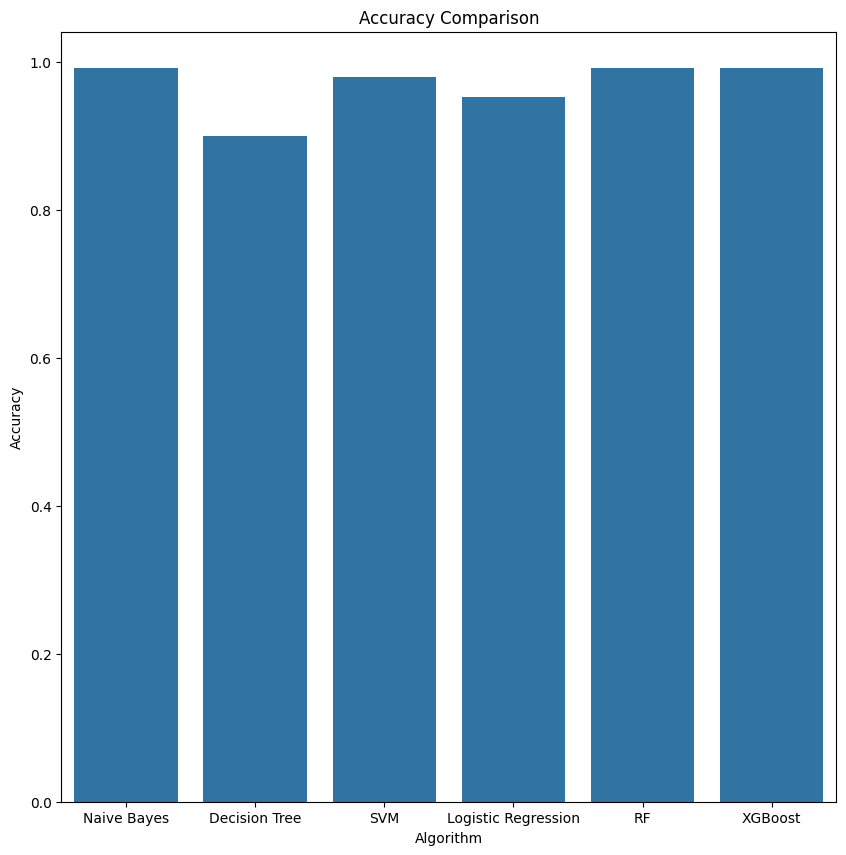

In [33]:
#Accuracy comparision
plt.figure(figsize=[10,10],dpi = 100)
plt.title('Accuracy Comparison')
plt.ylabel("Accuracy")
plt.xlabel("Algorithm")
sns.barplot(x = model,y = acc)

In [34]:
accuracy_model = dict(zip(model, acc))
for k, v in accuracy_model.items():
  print(k, '----->', v)

Naive Bayes -----> 0.990909090909091
Decision Tree -----> 0.9
SVM -----> 0.9795454545454545
Logistic Regression -----> 0.9522727272727273
RF -----> 0.990909090909091
XGBoost -----> 0.990909090909091


In [ ]:
import pickle
RF_pkl_filename = 'RF_pkl_file.pkl'
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
XB_Model_pkl.close()